# yfinance Library Assignment  

In [2]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

### Function Specification: `download_historical_data`

Implement the function `download_historical_data` to fetch historical price data using Yahoo Finance as the data source. This function should be capable of fetching historical data for a specified stock symbol between given start and end dates. Additionally, it should support an optional parameter for the data timeframe with a default value of `'1d'` (daily).

---

### Function Specifications

**Parameters:**
- `symbol`: The ticker symbol of the stock (e.g., `'RELI(ANCE.NS'`).
- `start_date`: Start date for the data in `'YYYY-MM-DD'` format.
- `end_date`: End date for the data in `'YYYY-MM-DD'` format.
- `timeframe`: The frequency of the data (`'1d'`, `'1wk'`, `'1mo'`), default is `'1d'`.

**Return:**  
A pandas `DataFrame` containing the fetched data.


### Function Specification: `download_historical_data`

Implement the function `download_historical_data` to fetch historical price data using Yahoo Finance as the data source. This function should be capable of fetching historical data for a specified stock symbol between given start and end dates. Additionally, it should support an optional parameter for the data timeframe with a default value of `'1d'` (daily).

---

### Function Specifications

**Parameters:**
- `symbol`: The ticker symbol of the stock (e.g., `'RELI(ANCE.NS'`).
- `start_date`: Start date for the data in `'YYYY-MM-DD'` format.
- `end_date`: End date for the data in `'YYYY-MM-DD'` format.
- `timeframe`: The frequency of the data (`'1d'`, `'1wk'`, `'1mo'`), default is `'1d'`.

**Return:**  
A pandas `DataFrame` containing the fetched data.


In [39]:
def download_historical_data( symbol ,start_date , end_date , timeframe):
    ticker= yf.Ticker(symbol)
    DataFrame = ticker.history(start=start_date , end = end_date , interval = timeframe)
    return DataFrame

### Visualization

Create a function for plotting the stock closing prices. This function should accept parameters for the plot and its objective is to display the graph.
   


In [45]:
def stock_closing_prices (symbol, DataFrame):
    closing_price = [price for price in DataFrame['Close']]
    plt.plot(closing_price)
    plt.title(symbol)
    plt.ylabel('price')
    return 0


### Run the functions 

**Choose Stocks:**  
   - Select any three stocks of your choice.
   - Fetch their data for the time period from **2012 to 2022**.
   - Select daily time frame i.e. 1d.

**Plot the Data:**  
   1. Plot the data for each stock separately.  
   2. Combine the data and plot all three stocks on the **same graph** for comparison.

0

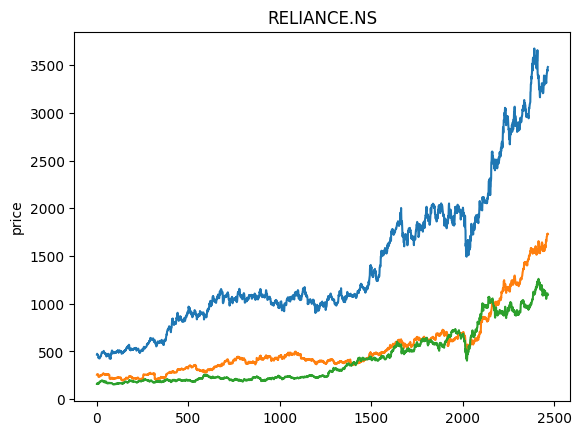

In [51]:
stock_closing_prices('TCS.NS', download_historical_data('TCS.NS','2012-01-01' , '2022-01-01' ,'1d'))
stock_closing_prices('INFY.NS', download_historical_data('INFY.NS','2012-01-01' , '2022-01-01' ,'1d'))
stock_closing_prices('RELIANCE.NS' , download_historical_data('RELIANCE.NS','2012-01-01' , '2022-01-01' ,'1d'))

### Technical Analysis 

**Simple Moving Averages (SMA) and Exponential Moving Averages (EMA)**  
   - Plot the SMA and EMA of 5 days of each of the three stocks that you have selected.
   - SMA and EMA graph should be plotted on the same graph 
   - Hence you have to plot three graphs of each stock with SMA and EMA
    

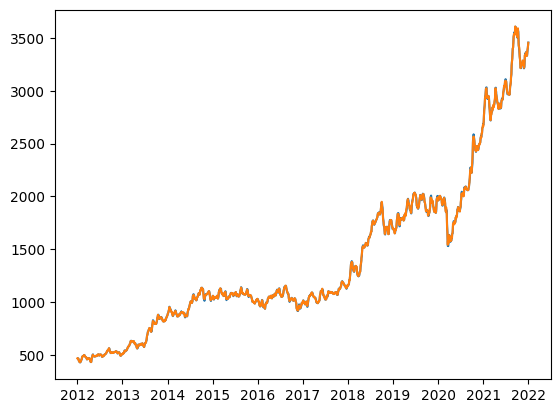

In [57]:
data1 =  download_historical_data('TCS.NS','2012-01-01' , '2022-01-01' ,'1d')
data2= download_historical_data('INFY.NS','2012-01-01' , '2022-01-01' ,'1d')
data3 = download_historical_data('RELIANCE.NS','2012-01-01' , '2022-01-01' ,'1d')

data1['5 days SMA'] = data1['Close'].rolling(window = 5).mean()
data1['5 days EMA'] = data1['Close'].ewm(adjust = False,span = 5).mean()
plt.plot(data1['5 days SMA'])
plt.plot(data1['5 days EMA'])

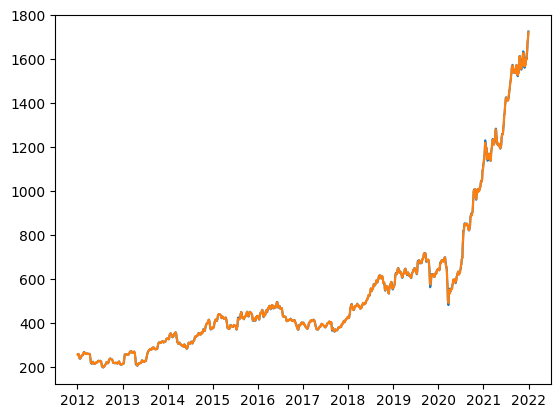

In [58]:
data2['5 days SMA'] = data2['Close'].rolling(window = 5).mean()
data2['5 days EMA'] = data2['Close'].ewm(adjust = False,span = 5).mean()
plt.plot(data2['5 days SMA'])
plt.plot(data2['5 days EMA'])

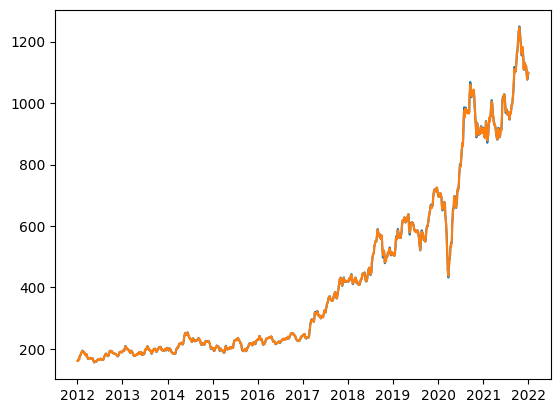

In [60]:
data3['5 days SMA'] = data3['Close'].rolling(window = 5).mean()
data3['5 days EMA'] = data3['Close'].ewm(adjust = False,span = 5).mean()
plt.plot(data3['5 days SMA'])
plt.plot(data3['5 days EMA'])

**MACD**  
   - Plot MACD and Signal line for each of the three stocks.
   - Fast Length (Short-term EMA): 12 periods
   - Slow Length (Long-term EMA): 26 periods
   - Signal Line (Smoothing EMA): 9 periods

    

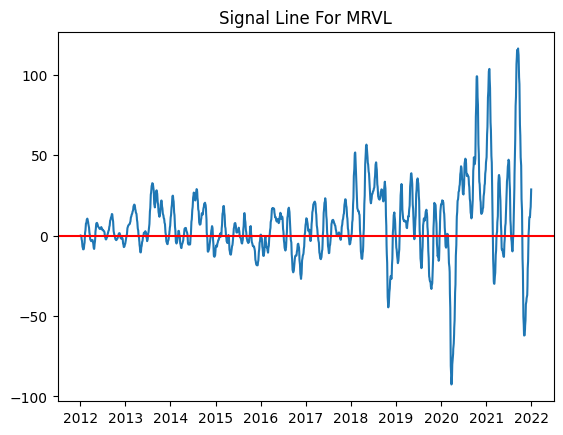

In [65]:
data1['EMA 12'] = data1['Close'].ewm(span = 12 , adjust = False).mean()
data1['EMA 26'] = data1['Close'].ewm(span = 26 , adjust = False).mean()
data1['MACD'] = data1['EMA 12'] - data1['EMA 26']
data1['Signal Line'] = data1['MACD'].ewm(span = 9,adjust =False).mean()
plt.plot(data1['Signal Line'])
plt.title('Signal Line For MRVL')
plt.axhline(y=0,color = 'red')

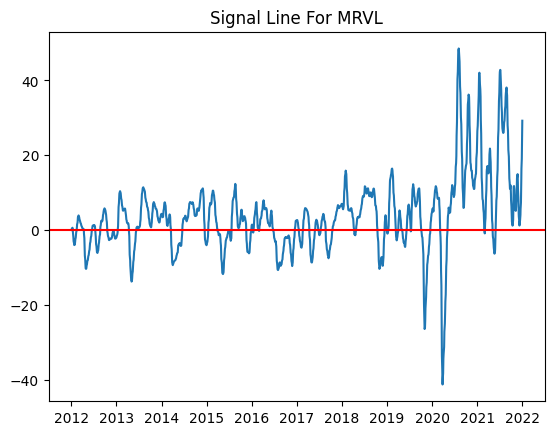

In [66]:
data2['EMA 12'] = data2['Close'].ewm(span = 12 , adjust = False).mean()
data2['EMA 26'] = data2['Close'].ewm(span = 26 , adjust = False).mean()
data2['MACD'] = data2['EMA 12'] - data2['EMA 26']
data2['Signal Line'] = data2['MACD'].ewm(span = 9,adjust =False).mean()
plt.plot(data2['Signal Line'])
plt.title('Signal Line For MRVL')
plt.axhline(y=0,color = 'red')

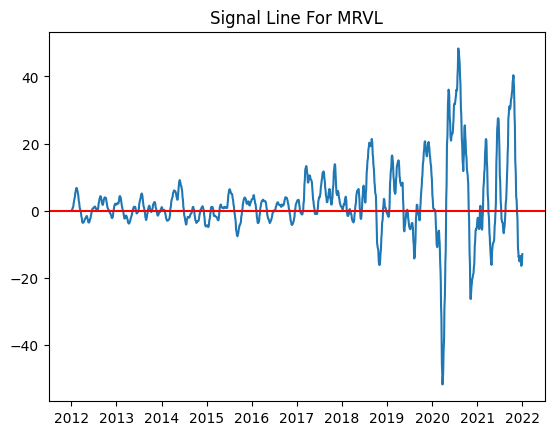

In [67]:
data3['EMA 12'] = data3['Close'].ewm(span = 12 , adjust = False).mean()
data3['EMA 26'] = data3['Close'].ewm(span = 26 , adjust = False).mean()
data3['MACD'] = data3['EMA 12'] - data3['EMA 26']
data3['Signal Line'] = data3['MACD'].ewm(span = 9,adjust =False).mean()
plt.plot(data3['Signal Line'])
plt.title('Signal Line For MRVL')
plt.axhline(y=0,color = 'red')

**RSI**  
   - Plot RSI for each of the three stocks
   - Period = 14 days 
   - Also show the overbought and oversold regions 
   - Overbought condition: RSI above 70
   - Oversold condition: RSI below 30
   
    

In [71]:
def calculate_rsi(data,window=14):
    delta = data['Close'].diff()
    gain = delta.clip(lower = 0)
    loss = -delta.clip(upper = 0)
    gain_avg = gain.rolling(window = window).mean()
    loss_avg = loss.rolling(window = window).mean()
    rs = gain_avg/loss_avg
    rsi = 100 - (100/(1+rs))
    data['RSI'] = rsi
    
calculate_rsi(data1)
calculate_rsi(data2)
calculate_rsi(data3)

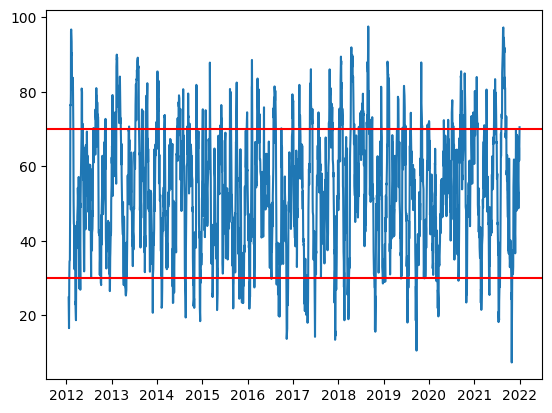

In [72]:

plt.plot(data1['RSI'])
plt.axhline(y=70,color = 'red')
plt.axhline(y=30,color = 'red')

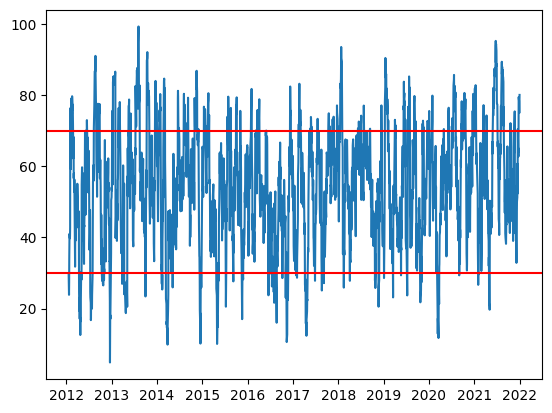

In [73]:
plt.plot(data2['RSI'])
plt.axhline(y=70,color = 'red')
plt.axhline(y=30,color = 'red')

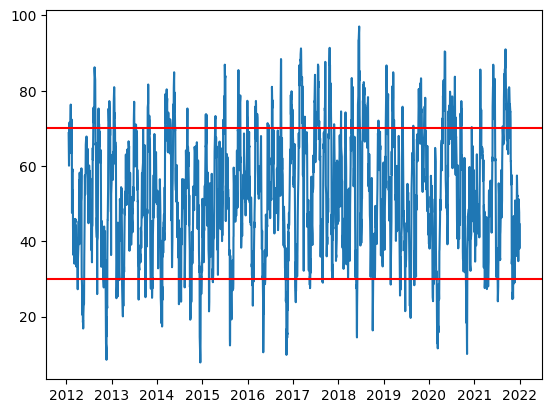

In [74]:
plt.plot(data3['RSI'])
plt.axhline(y=70,color = 'red')
plt.axhline(y=30,color = 'red')

### Summarize your analysis

In [77]:
data1
data2
data3

,Open,High,Low,Close,Volume,Dividends,Stock Splits,5 days SMA,5 days EMA,EMA 12,EMA 26,MACD,Signal Line,RSI
Date,,,,,,,,,,,,,,
2012-01-02 00:00:00+05:30,159.276764,162.236908,157.070938,161.505447,18808107,0.0,0.0,NaN,161.505447,161.505447,161.505447,0.000000,0.000000,NaN
2012-01-03 00:00:00+05:30,162.808365,166.157104,162.374054,165.642807,20489219,0.0,0.0,NaN,162.884567,162.141964,161.811918,0.330046,0.066009,NaN
2012-01-04 00:00:00+05:30,166.271408,167.082870,163.059814,163.699844,18541902,0.0,0.0,NaN,163.156326,162.381638,161.951765,0.429873,0.138782,NaN
2012-01-05 00:00:00+05:30,163.436966,165.711380,158.659576,159.893936,28959200,0.0,0.0,NaN,162.068863,161.998915,161.799333,0.199582,0.150942,NaN
2012-01-06 00:00:00+05:30,159.333908,165.494217,159.242477,164.019852,20575210,0.0,0.0,162.952377,162.719193,162.309828,161.963816,0.346012,0.189956,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27 00:00:00+05:30,1089.854980,1097.446655,1083.647827,1093.869995,4017223,0.0,0.0,1087.815112,1090.337465,1094.058808,1108.855465,-14.796657,-16.075111,48.618389
2021-12-28 00:00:00+05:30,1096.338989,1109.837891,1095.162231,1106.861206,6374613,0.0,0.0,1095.859058,1095.845379,1096.028408,1108.707742,-12.679334,-15.395955,47.607477
2021-12-29 00:00:00+05:30,1103.446167,1116.368164,1099.338745,1108.753418,15425312,0.0,0.0,1099.218799,1100.148058,1097.986102,1108.711126,-10.725024,-14.461769,42.853379
